In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from diffusionpy import vpure,Diffusion_MS
import matplotlib.pyplot as plt


In [2]:
wv0=0.00001
dl0=0.68
wi0=np.asarray([wv0,(1-wv0)*(1-dl0),(1-wv0)*dl0])
mobile=np.asarray([True,False,False])


In [3]:
isothermdata=np.asarray([[0.,	0.27288],[0.05   , 0.23445],[0.1    , 0.19755],[0.15   , 0.17761],[0.2    , 0.16723],[0.25   , 0.15672],[0.3    , 0.14609],[0.35   , 0.13535],[0.45   , 0.11365],[0.5    , 0.10276],[0.55   , 0.09191],[0.6    , 0.0812 ],[0.65   , 0.07075],[0.7    , 0.0607 ],[0.75   , 0.05123],[0.8    , 0.04251],[0.85   , 0.03468],[0.9    , 0.03224],[0.95   , 0.0312 ],[1.     , 0.03033]])
texp=np.array([6.86410000e-01, 9.70870000e-01, 1.16440000e+00, 1.34267000e+00,1.51946000e+00, 1.70083000e+00, 1.88593000e+00, 2.07982000e+00,2.29310000e+00, 2.51266000e+00, 2.74563000e+00, 3.01360000e+00,3.30340000e+00, 3.61789000e+00, 3.95521000e+00, 4.31694000e+00,4.73299000e+00, 5.18648000e+00, 5.68148000e+00, 6.22365000e+00,6.83932000e+00, 7.50385000e+00, 8.25651000e+00, 9.07423000e+00,9.96385000e+00, 1.09691400e+01, 1.20985300e+01, 1.33438000e+01,1.47500300e+01, 1.63442200e+01, 1.81750400e+01, 2.02988300e+01,2.27739900e+01, 2.56930000e+01, 2.93156200e+01, 3.37533200e+01,3.95170800e+01, 4.71125600e+01, 5.69329800e+01, 6.84876100e+01,8.10790000e+01, 9.34369900e+01, 1.06815260e+02, 1.19880060e+02,1.33173520e+02, 1.46167850e+02, 1.59496570e+02, 1.72555890e+02,1.85492070e+02, 1.98581620e+02, 2.11153550e+02, 2.24336890e+02,2.37397630e+02, 2.50469300e+02, 2.63170580e+02, 2.76437840e+02,2.89263840e+02, 3.01782000e+02, 3.14619910e+02, 3.27471030e+02,3.41030680e+02, 3.54145280e+02, 3.67701340e+02, 3.80526380e+02,3.93088480e+02, 4.04158040e+02, 4.16838380e+02, 4.29968680e+02,4.43379440e+02, 4.56449630e+02, 4.69493120e+02, 4.82242030e+02,4.94592700e+02, 5.06188850e+02, 5.18694030e+02, 5.30647520e+02,5.42400560e+02, 5.54387100e+02, 5.66847690e+02, 5.78911580e+02,5.89700820e+02, 5.97124290e+02, 6.10320260e+02, 6.23590570e+02,6.36443830e+02, 6.49776620e+02, 6.62636910e+02, 6.75660300e+02,6.88569180e+02, 7.01197820e+02, 7.14192490e+02, 7.27281540e+02,7.40282910e+02, 7.53344530e+02, 7.66133530e+02, 7.79029070e+02,7.92108150e+02, 8.05187570e+02, 8.18230220e+02, 8.30970590e+02,8.43974520e+02, 8.56787060e+02, 8.70063160e+02, 8.82637180e+02,8.95529720e+02, 9.08617170e+02, 9.21336040e+02, 9.33759480e+02,9.46392180e+02, 9.59546880e+02, 9.72547710e+02, 9.82684560e+02,9.95917380e+02, 1.00925117e+03, 1.02205453e+03, 1.03492733e+03,1.04788277e+03, 1.06103489e+03, 1.07387702e+03, 1.08717852e+03,1.10026366e+03, 1.11340370e+03, 1.12643627e+03, 1.13961651e+03,1.15299944e+03, 1.16645258e+03, 1.17948345e+03, 1.19252385e+03,1.20554155e+03, 1.21865637e+03, 1.23158455e+03, 1.24487528e+03,1.25802695e+03, 1.27152682e+03, 1.28482589e+03, 1.29812527e+03,1.31108025e+03, 1.32373035e+03, 1.33670736e+03, 1.34985556e+03,1.36300798e+03, 1.37614242e+03, 1.38930722e+03, 1.40233218e+03,1.41549331e+03, 1.42906025e+03, 1.44195884e+03, 1.45545378e+03,1.46853315e+03, 1.48147948e+03, 1.49453087e+03, 1.50741426e+03,1.52098095e+03, 1.53430390e+03, 1.54721946e+03, 1.56071565e+03,1.57407852e+03, 1.58724270e+03, 1.60049173e+03, 1.61355806e+03,1.62666755e+03, 1.63985875e+03, 1.65281532e+03, 1.66603727e+03,1.67912218e+03, 1.69204180e+03, 1.70552058e+03, 1.71843760e+03,1.73143095e+03, 1.74467865e+03, 1.75804715e+03, 1.77121508e+03,1.78416925e+03, 1.79759363e+03, 1.81048015e+03, 1.82342822e+03,1.83668256e+03, 1.84965338e+03, 1.86278081e+03, 1.87613408e+03,1.88720971e+03, 1.90041882e+03, 1.91096359e+03, 1.92182702e+03,1.93483266e+03, 1.94810783e+03, 1.96149598e+03, 1.97487072e+03,1.98840716e+03, 2.00169715e+03, 2.01473912e+03, 2.02765365e+03,2.04094907e+03, 2.05422560e+03, 2.06169773e+03, 2.06366274e+03,2.06782502e+03, 2.07926432e+03, 2.08430000e+03])
wwexp=np.array([0.,  0.,  3.060e-03,  4.570e-03,  6.070e-03,7.540e-03,  9.030e-03,  1.052e-02,  1.200e-02,  1.346e-02,1.488e-02,  1.640e-02,  1.788e-02,  1.935e-02,  2.080e-02,2.225e-02,  2.376e-02,  2.523e-02,  2.671e-02,  2.816e-02,2.967e-02,  3.114e-02,  3.264e-02,  3.412e-02,  3.558e-02,3.706e-02,  3.854e-02,  4.000e-02,  4.147e-02,  4.294e-02,4.442e-02,  4.591e-02,  4.740e-02,  4.893e-02,  5.049e-02,5.210e-02,  5.372e-02,  5.535e-02,  5.686e-02,  5.810e-02,5.901e-02,  5.966e-02,  6.011e-02,  6.043e-02,  6.065e-02,6.080e-02,  6.094e-02,  6.103e-02,  6.109e-02,  6.115e-02,6.118e-02,  6.121e-02,  6.124e-02,  6.128e-02,  6.132e-02,6.136e-02,  6.139e-02,  6.143e-02,  6.150e-02,  6.154e-02,6.160e-02,  6.166e-02,  6.173e-02,  6.180e-02,  6.189e-02,6.204e-02,  6.216e-02,  6.225e-02,  6.236e-02,  6.246e-02,6.255e-02,  6.270e-02,  6.282e-02,  6.294e-02,  6.304e-02,6.317e-02,  6.331e-02,  6.343e-02,  6.361e-02,  6.375e-02,6.378e-02,  6.395e-02,  6.413e-02,  6.429e-02,  6.447e-02,6.462e-02,  6.478e-02,  6.497e-02,  6.512e-02,  6.532e-02,6.550e-02,  6.569e-02,  6.589e-02,  6.609e-02,  6.628e-02,6.643e-02,  6.666e-02,  6.682e-02,  6.705e-02,  6.721e-02,6.766e-02,  6.784e-02,  6.803e-02,  6.820e-02,  6.840e-02,6.856e-02,  6.876e-02,  6.892e-02,  6.911e-02,  6.927e-02,6.942e-02,  6.958e-02,  6.974e-02,  6.991e-02,  7.009e-02,7.026e-02,  7.041e-02,  7.060e-02,  7.076e-02,  7.091e-02,7.107e-02,  7.122e-02,  7.137e-02,  7.151e-02,  7.167e-02,7.181e-02,  7.192e-02,  7.208e-02,  7.221e-02,  7.236e-02,7.247e-02,  7.262e-02,  7.275e-02,  7.285e-02,  7.299e-02,7.312e-02,  7.325e-02,  7.335e-02,  7.348e-02,  7.360e-02,7.369e-02,  7.381e-02,  7.394e-02,  7.407e-02,  7.416e-02,7.427e-02,  7.440e-02,  7.448e-02,  7.460e-02,  7.468e-02,7.479e-02,  7.490e-02,  7.499e-02,  7.511e-02,  7.520e-02,7.529e-02,  7.540e-02,  7.550e-02,  7.558e-02,  7.570e-02,7.577e-02,  7.587e-02,  7.597e-02,  7.606e-02,  7.613e-02,7.623e-02,  7.632e-02,  7.642e-02,  7.649e-02,  7.658e-02,7.666e-02,  7.674e-02,  7.685e-02,  7.693e-02,  7.699e-02,7.707e-02,  7.716e-02,  7.724e-02,  7.730e-02,  7.740e-02,7.747e-02,  7.754e-02,  7.751e-02,  7.767e-02,  7.774e-02,7.782e-02,  7.789e-02,  7.797e-02,  7.805e-02,  7.818e-02,7.825e-02,  7.832e-02,  7.840e-02,  7.846e-02,  7.826e-02,7.820e-02,  7.869e-02,  7.862e-02,  7.875e-02])
Xwexp=wwexp/(1-wwexp)
wwLiso=isothermdata[:,1] #np.asarray([0.27087,0.22302, 0.13792, 0.09208, 0.06118])
dliso=isothermdata[:,0] #np.asarray([0,0.1 , 0.3 , 0.5 , 0.68])
XwLiso=wwLiso/(1-wwLiso)
crystiso=(dl0-dliso)/(1-dliso)
alphaiso=crystiso/dl0
Xwiso=(1-crystiso)*XwLiso
wwiso=Xwiso/(1+Xwiso)
alphaiso_fun=interp1d(wwiso,alphaiso,bounds_error=False)
alphaexp=np.fmin(np.fmax(alphaiso_fun(wwexp),0),1)




D:\Temp\ipykernel_11892\523603963.py:8: RuntimeWarning: divide by zero encountered in divide
  crystiso=(dl0-dliso)/(1-dliso)
D:\Temp\ipykernel_11892\523603963.py:11: RuntimeWarning: invalid value encountered in divide
  wwiso=Xwiso/(1+Xwiso)


In [4]:
wv_fun=interp1d(dliso,wwLiso,bounds_error=False,fill_value=(np.max(wwLiso),np.min(wwLiso)))
wv8=wv_fun(dl0)
wi8=np.asarray([wv8,(1-wv8)*(1-dl0),(1-wv8)*dl0])
Mi=np.asarray([18.015,65000.,230.26])
T=298.15
p=1E5


In [5]:

par={"mi":np.asarray([1.20469,2420.99, 8.105152]),
"si": np.asarray([2.797059952,2.947, 2.939]),
"ui" :np.asarray([353.95,205.27, 229.45]),
"eAi" :np.asarray([2425.67,0., 934.2]),
"kAi":np.asarray([0.04509,0.02, 0.02]),
"NAi":np.asarray([1.,653., 2.]),
"Mi": Mi,
"kij":np.asarray([-0.128,0.00648,-0.0574]),
"kijA":np.asarray([0.,0.,0.]),
"deltaHSL":np.asarray([0.,0.,31500.]),
"TSL":np.asarray([0.,0.,429.47]),
"cpSL":np.asarray([0.,0.,87.44])}

crystpar={"A":2e-14,"B":4.15E7 ,"n":1,'wv_fun':wv_fun}
vpures=vpure(p,T,**par)
par["vpure"]=vpures
# crystpar={"A":8.6E-19,"B":1.98E+1,"C":7.1E-18,"n":3,'tnuc':0*60}


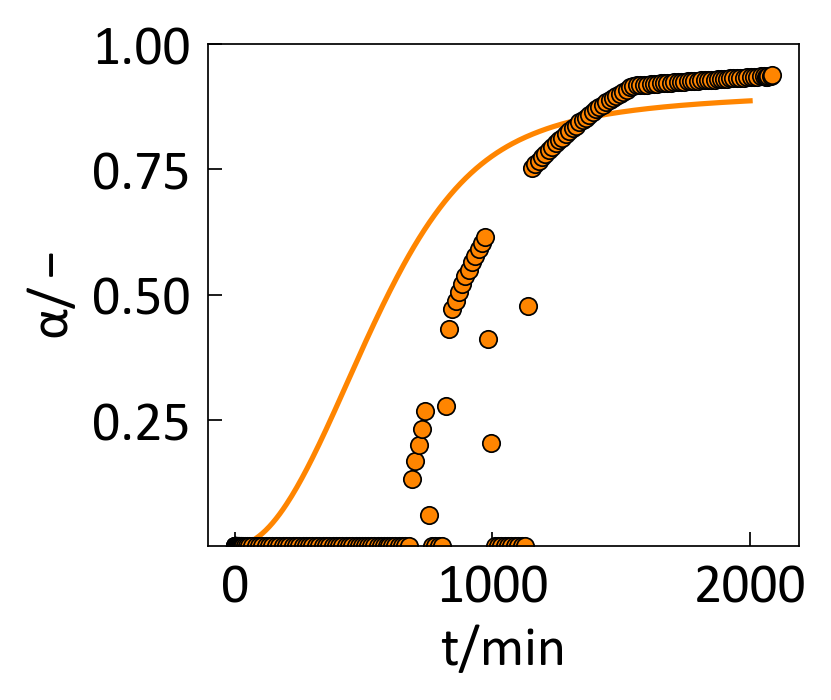

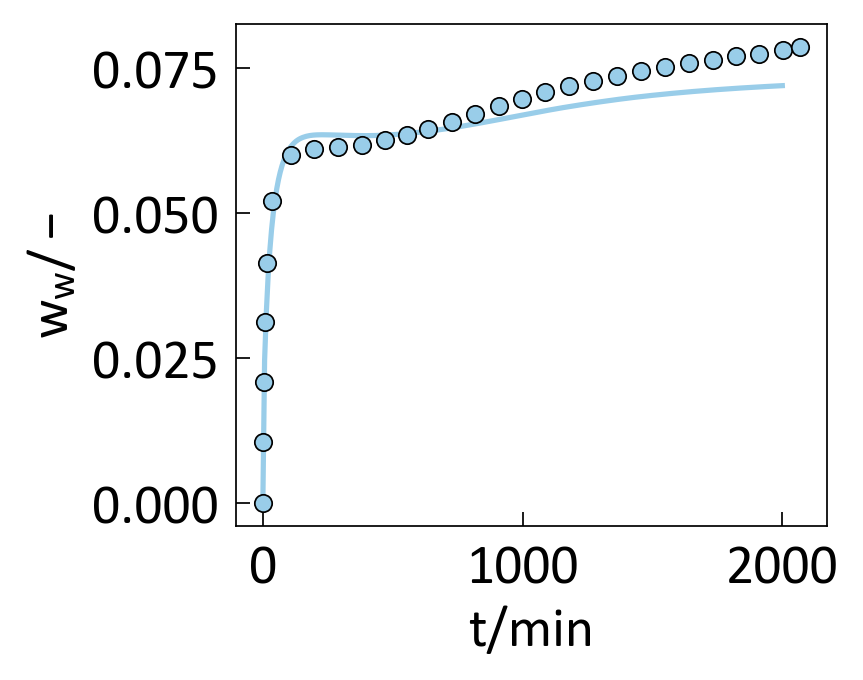

In [7]:
nt=300
t=np.linspace(0,2000,nt)*60
# witB,alphaB,r=cryst_iter(t,mobile,wi0,wi8,crystpar,lngi_fun,wv_fun)
tmin=t/60
Dvec=np.asarray([1E-13,1E-13,1E-13])*4
L=2.5E-5
# dlnai_dlnwi_fun=lambda wi: Gammaij(T,wi,par)
wt,wtz,zvec,Lt,alpha=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,saftpar=par,**crystpar)
alphaB=np.average(alpha,axis=0)
fig,ax=plt.subplots()
fig1,ax1=plt.subplots()
ax.plot(t/60,alphaB,'C3-')
ax.plot(texp,alphaexp,'C3o')
ax.set_yticks([0.25,0.5,0.75,1])
ax.set_ylim([0,1])
ax.set_xlabel('t/min')
ax.set_ylabel(r'$\alpha/-$')

XwL=wt[:,0]/(1-wt[:,0])
Xw=XwL*(1-alphaB*dl0)
ww=Xw/(1+Xw)
ax1.plot(t/60,ww,'C1-')
ax1.plot(texp[::7],wwexp[::7],'C1o')
ax1.set_xlabel('t/min')
ax1.set_ylabel('$w_w/-$')
pd.DataFrame((tmin,ww)).T.to_clipboard(excel=True, sep=None, index=False, header=None)

